In [1]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def ensemble_ocr(image, readers):
    # Perform OCR using multiple OCR models
    ocr_results = []
    for reader in readers:
        try:
            results = reader.readtext(image)
            ocr_results.append(results)
        except Exception as e:
            print(f"Error in OCR with {reader}: {e}")

    return ocr_results

In [3]:
def display_image_with_ocr(image_path, readers, confidence_threshold=0.5):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Convert BGR image to RGB for display in matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using plt
    plt.imshow(image_rgb)
    plt.axis('off')  # Turn off axis labels
    plt.show()

    # Ensemble OCR using EasyOCR and Tesseract
    try:
        ocr_results = ensemble_ocr(image, readers)

        print("OCR Results:")
        for i, reader_results in enumerate(ocr_results):
            print(f"OCR Model {i + 1}:")
            for result in reader_results:
                text, confidence = result[1], result[2]
                print(f"  Text: {text}, Confidence: {confidence}")

        # Draw bounding boxes on the image based on the ensemble OCR results
        for reader_results in ocr_results:
            for result in reader_results:
                (top_left, top_right, bottom_right, bottom_left) = result[0]
                pts = np.array([top_left, top_right, bottom_right, bottom_left], dtype=int)
                pts = pts.reshape((-1, 1, 2))
                cv2.polylines(image, [pts], isClosed=True, color=(0, 255, 0), thickness=2)

        # Display the image with ensemble OCR results
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Error in displaying results: {e}")

In [4]:
# Replace 'path/to/your/image.jpg' with the actual path to your image
image_path = "E:/CodeBase/GitHub/Image_Processing_and_Computer_Vision/2. OCR - Optical Charater Recognition/car.jpg"

In [5]:
# Initialize EasyOCR readers with different models/languages
reader_easyocr_en = easyocr.Reader(['en'])
reader_easyocr_fr = easyocr.Reader(['fr'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [6]:
# Add more readers as needed
# Create a list of readers
readers = [reader_easyocr_en, reader_easyocr_fr]

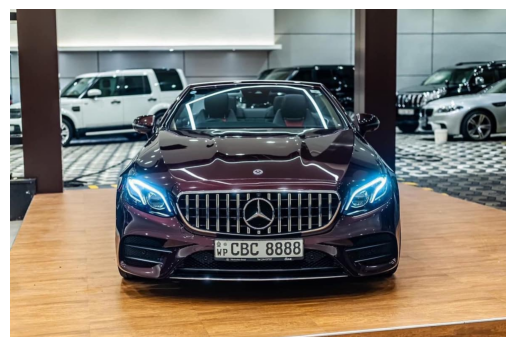

OCR Results:
OCR Model 1:
  Text: WP, Confidence: 0.9384107668733576
  Text: CBC 8888, Confidence: 0.9450496441116675
OCR Model 2:
  Text: WP, Confidence: 0.6140944020903112
  Text: CBC 8888, Confidence: 0.9871320307589361


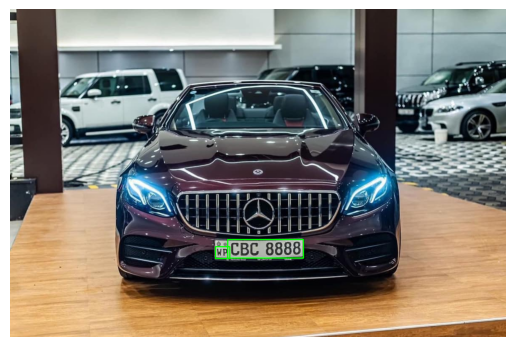

In [7]:
# Display the image with ensemble OCR results
display_image_with_ocr(image_path, readers)
